<a href="https://colab.research.google.com/github/sftSalman/pytorch/blob/main/mnist_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import torch 
import torchvision
import torch.nn as nn 
from torchvision import datasets, models,transforms
import os
import numpy as np 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms


In [20]:
train_data = torchvision.datasets.FashionMNIST(root='..//../data',
                                           train=True,
                                           download=True,
                                           transform = transforms.ToTensor)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ..//../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ..//../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ..//../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ..//../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ..//../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ..//../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ..//../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ..//../data/FashionMNIST/raw



In [21]:
test_data = torchvision.datasets.MNIST(root='..//../data',
                                       train=False,
                                       download =True,
                                       transform= transforms.ToTensor)

In [22]:
len(train_data)

60000

In [23]:
len(test_data)

10000

In [24]:
print(train_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [25]:
print(train_data.data.shape)

torch.Size([60000, 28, 28])


In [26]:
print(torch.max(train_data.data[0]))

tensor(255, dtype=torch.uint8)


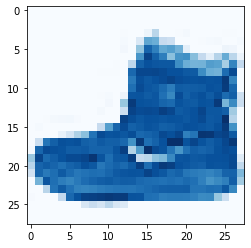

In [27]:
plt.imshow(train_data.data[0],cmap='Blues')

In [28]:
batch_size=64
input_size = 28*28
num_classes = 10 
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0343, -0.0263,  0.0271,  ...,  0.0079, -0.0122,  0.0196],
        [-0.0137,  0.0175, -0.0019,  ..., -0.0263,  0.0295, -0.0307],
        [-0.0218, -0.0111, -0.0324,  ...,  0.0173, -0.0191, -0.0193],
        ...,
        [ 0.0232, -0.0147,  0.0198,  ..., -0.0214,  0.0321,  0.0030],
        [-0.0258,  0.0233,  0.0260,  ..., -0.0296,  0.0305, -0.0045],
        [-0.0229,  0.0283,  0.0037,  ..., -0.0037,  0.0097, -0.0030]],
       requires_grad=True)

In [29]:
print(model.bias)

Parameter containing:
tensor([ 0.0020,  0.0227, -0.0183, -0.0251,  0.0005, -0.0258, -0.0167, -0.0212,
        -0.0136, -0.0327], requires_grad=True)


In [47]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)


In [48]:
test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [49]:
len(train_loader)

938

In [50]:
train_loader.batch_size

64

In [51]:
criterion =nn.CrossEntropyLoss()

In [52]:
optimizer = torch.optim.SGD(model.parameters(),lr=.001)

In [54]:
total_step = len(train_loader)

In [59]:
for image,labels in train_loader:
  print(labels)

TypeError: ignored